In [1]:
# import matplotlib
# matplotlib.use('TkAgg')
import numpy as np
import math as m
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from functools import reduce
import csv
%matplotlib inline
from utils import *

In [14]:
# %matplotlib inline
# r=1.01;
# K=2000.;
# params=(r,K);
# r,K=params
# # print(r)
# N0=100;

# def Ndot(N,t,params):
#     r,K=params
#     dN=r*N*(1.0-N/K);
#     return dN;


def fNdot(N,t,params):
#     tr=T, r0=r0;
    (s,i,r)=N;
    T,r0=params;
    ds=0.      -r0*s*i/T;
    di=r0*s*i/T-i/T;
    dr=i/T;
    return (ds,di,dr)
def Ndot(N,t,params):
    (S,I,R)=N;
    ki,kr=params;
    dS= 0.   -ki*S*I;
    dI=ki*S*I-kr*I;
    dR=kr*I  -0.;
    return (dS,dI,dR)

def vfield(axis,Ndot,num=20,scale=1/0.0015,norm_method='none'):
    xlim=list(axis.get_xlim());
    ylim=list(axis.get_ylim());
    x=np.linspace(xlim[0],xlim[1],num);
    y=np.linspace(ylim[0],ylim[1],num);
    xs,ys=np.meshgrid(x,y);
    us,vs=Ndot(xs,ys);
    
    ls=(us**2+vs**2)**0.5;        
    if norm_method=='log':
        lls=np.min(np.log(ls),0);
        us=us/ls*lls;
        vs=vs/ls*lls;
    elif norm_method=='len':
        ls=(us**2+vs**2)**0.5;
        us=us/ls;
        vs=vs/ls;
    axis.quiver(xs,ys,us,vs,color='b',scale_units='inches',angles='xy',pivot='mid',scale=scale)




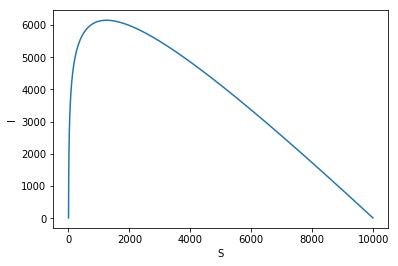

In [38]:
params=(0.00016,0.2);
N0=[(9990,10,0),('S','I','R')];

class intobj():
    def __init__(self,Ndot,N0,params):
        self.fcn=Ndot;
        self.ss,self.labels=N0;
        self.params=params;
    def evo(self,ts):
        self.ts=ts;
        Ns=odeint(self.fcn,self.ss,ts,args=(self.params,));
        intobj.Ns=Ns;
        return(Ns)
    def line(self,ax,idx):
        ax.plot(self.ts,self.Ns[:,idx],label=self.labels[idx]);
    def phase(self,ax,idx):
        xi,yi=idx;
        ax.plot(self.Ns[:,xi],self.Ns[:,yi]);
        ax.set_xlabel(self.labels[xi]);
        ax.set_ylabel(self.labels[yi]);
        
    
s1=intobj(Ndot,N0,params);
s1.evo(np.arange(0,40,0.025))
plt.close("all");
fig1=plt.figure();
ax=plt.subplot(1,1,1)
s1.phase(ax,[0,1])


34.325
[(6151.893222393971, 6.4500000000000002)]
0.615805127367


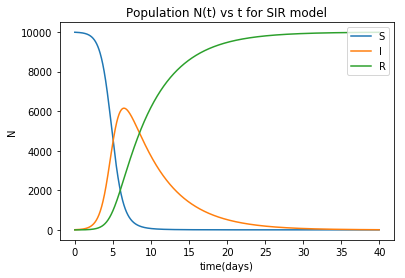

In [33]:
plt.close("all");
fig1=plt.figure();
ax=plt.subplot(1,1,1)
for i in range(3):
    s1.line(ax,i)
ax.set_xlabel('time(days)')
ax.set_ylabel('N')
ax.set_title('Population N(t) vs t for SIR model')
ax.legend();
ax.legend(loc=1)
fig1.savefig('task1_q5.png')

dur=min([t for x,t in zip(s1.Ns[:,1],s1.ts) if t>10 and x<30]);
print(dur)
s1.ss[0]-s1.Ns[-1,0]
peak=list([(x,t) for x,t in zip(s1.Ns[:,1],s1.ts) if x==max(s1.Ns[:,1])]);
print(peak)
print(peak[0][0]/9990)


# ax.plot(ts,intobj.Ns[:,0],label='S')
# ax.plot(intobj.Ns[:,1],label='I')
# ax.plot(intobj.Ns[:,2],label='R')
# t_max=20;
# num_tsteps=1001
# ts=np.linspace(0,t_max,num_tsteps);
# Ns=odeint(Ndot,N0,ts,args=(params,))

# ax.plot(ts,Ns,'-',label='N(t)')
# vfield(ax,Ndot,20,1/0.0015);

    
# fig1.show()
# help(type(fig1))

In [ ]:

s1.ss=(1990,10,8000);
s1.evo(np.linspace(0,100,1001));
fig2=plt.figure(figsize=[5,9])
ax=plt.subplot(2,1,1)
for i in range(3):
    s1.line(ax,i);
ax.legend()
ax.set_xlabel('time(days)')
ax.set_ylabel('N')
ax.set_title('All populations vs time for SIR model')
ax.legend();

ax2=plt.subplot(2,1,2)
s1.line(ax2,1);
ax2.set_xlabel('time(days)')
ax2.set_ylabel('I')
ax2.set_title('Infected vs time for SIR model')
ax2.legend();
ax2.legend(loc=1)
fig2.savefig('task1_q7.png')
print('total infection is ',s1.ss[0]-s1.Ns[-1,0])
s1.__dict__
    
    

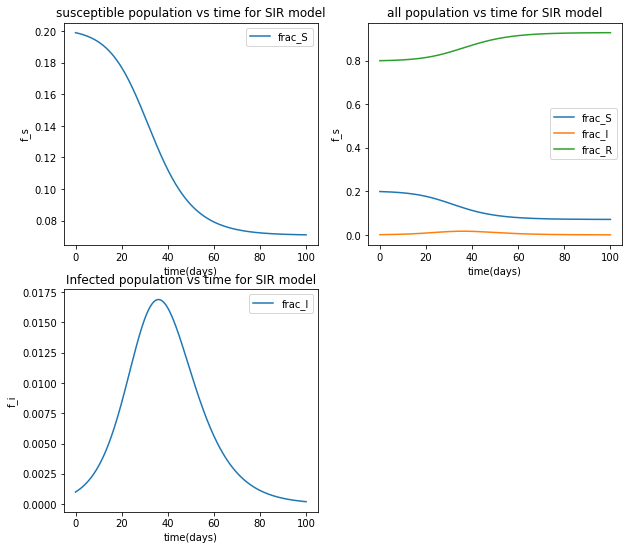

In [39]:

def fNdot(N,t,params):
#     tr=T, r0=r0;
    (s,i,r)=N;
    T,r0=params;
    ds=0.      -r0*s*i/T;
    di=r0*s*i/T-i/T;
    dr=i/T;
    return (ds,di,dr)
params=(5.,8.0);
a=.2;
b=.001
N0=[(.199,0.001,0.800),('frac_S','frac_I','frac_R')];
s1=intobj(fNdot,N0,params);
s1.evo(np.linspace(0,100,1001));
fig2=plt.figure(figsize=[10,9])

ax=plt.subplot(2,2,2)
for i in range(3):
    s1.line(ax,i);
ax.legend()
ax.set_xlabel('time(days)')
ax.set_ylabel('f_s')
ax.set_title('all population vs time for SIR model')
ax.legend();

ax=plt.subplot(2,2,1)
for i in range(1):
    s1.line(ax,i);
ax.legend()
ax.set_xlabel('time(days)')
ax.set_ylabel('f_s')
ax.set_title('susceptible population vs time for SIR model')
ax.legend();

ax2=plt.subplot(2,2,3)
s1.line(ax2,1);
ax2.set_xlabel('time(days)')
ax2.set_ylabel('f_i')
ax2.set_title('Infected population vs time for SIR model')
ax2.legend();
ax2.legend(loc=1)
fig2.savefig('task2_q4.png')

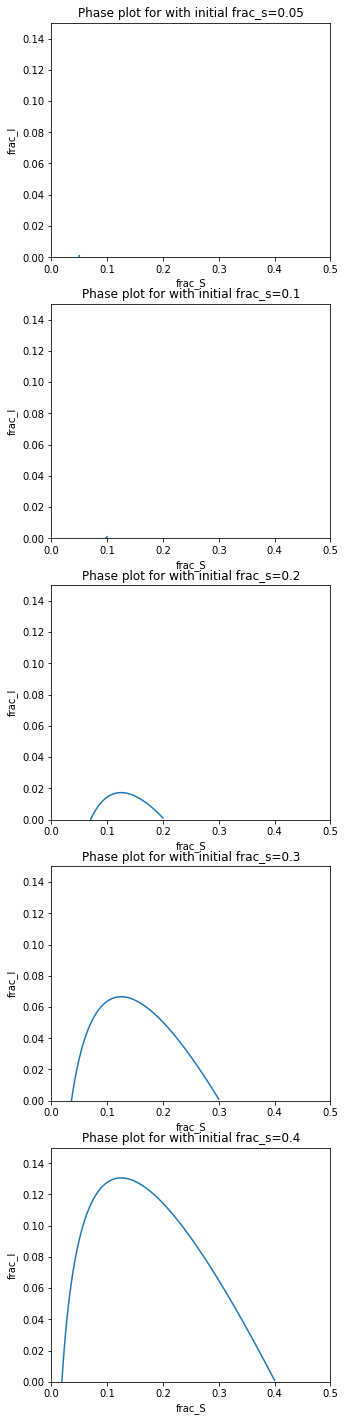

In [3]:
import utils
from scipy.integrate import odeint
from utils import *
# %matplotlib inline

fss=[0.05,0.10,0.20,0.30,0.40];
fi=0.001;
siz=len(fss);
fig=plt.figure(figsize=[5,25]);

params=(5.,8.0);
N0=[(.199,0.001,0.800),('frac_S','frac_I','frac_R')];
s0=intobj(fNdot,N0,params);

for i in range(siz):
    fr=1-fss[i]-fi;
    s0.ss=(fss[i],fi,fr);
    s0.evo(np.linspace(0,100,1001))
    ax=plt.subplot(siz,1,i+1);
    
    ax.plot(s0.Ns[:,0],s0.Ns[:,1]);
        
#     s0.phase(ax,(0,1))
    ax.set_xlabel(s0.labels[0]);
    ax.set_ylabel(s0.labels[1]); 
    ax.set_title('Phase plot for with initial frac_s='+str(fss[i]))
    
    ax.set_ylim(0,0.15)
    ax.set_xlim(0,0.5)
fig.savefig('task2_q7.png')

/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel/__main__.py:46: RuntimeWarning: invalid value encountered in divide
/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel/__main__.py:47: RuntimeWarning: invalid value encountered in divide


{'fcn': <function utils.fNdot>,
 'labels': ('frac_S', 'frac_I', 'frac_R'),
 'params': (5.0, 8.0),
 'ss': (0.4, 0.001, 0.599),
 'ts': array([   0. ,    0.1,    0.2, ...,   99.8,   99.9,  100. ])}

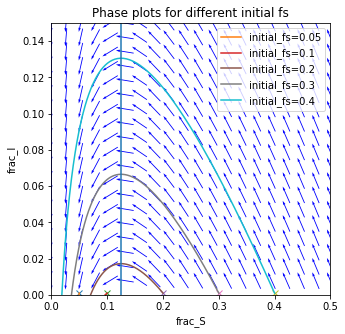

In [19]:
fig=plt.figure(figsize=[5,5]);

ax=plt.subplot(1,1,1);
   
for i in range(siz):
    fr=1-fss[i]-fi;
    s0.ss=(fss[i],fi,fr);
    s0.evo(np.linspace(0,100,1001))
    ax.plot(fss[i],fi,'x');    
    ax.plot(s0.Ns[:,0],s0.Ns[:,1],label='initial_fs='+str(fss[i]));
        
#     s0.phase(ax,(0,1))
    ax.set_xlabel(s0.labels[0]);
    ax.set_ylabel(s0.labels[1]); 
    ax.set_title('Phase plots for different initial fs');
    ax.legend()
    
    ax.set_ylim(0,0.15)
    ax.set_xlim(0,0.5)
ax.plot([0.125,0.125],[0, 0.2])
# params=(5.,8.0)
vfunc=lambda x,y:fNdot((x,y,1-x-y),0,s0.params)[0:2];
vfield(ax,vfunc,20,2/0.5,'len')
fig.savefig('task2_q8.png')
s0.__dict__
